<a href="https://colab.research.google.com/github/MacWorldPro/Module_34/blob/main/Breast_Cancer_Detection_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Taking our first step let us first load the dataset
from sklearn.datasets import load_breast_cancer

In [3]:
dataset=load_breast_cancer()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [ ]:
dataset.target

In [7]:
df['target']=dataset.target

In [8]:
# Let us first do EDA and know about our dataset in more detail
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.shape

(569, 31)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
df.median()

mean radius                 13.370000
mean texture                18.840000
mean perimeter              86.240000
mean area                  551.100000
mean smoothness              0.095870
mean compactness             0.092630
mean concavity               0.061540
mean concave points          0.033500
mean symmetry                0.179200
mean fractal dimension       0.061540
radius error                 0.324200
texture error                1.108000
perimeter error              2.287000
area error                  24.530000
smoothness error             0.006380
compactness error            0.020450
concavity error              0.025890
concave points error         0.010930
symmetry error               0.018730
fractal dimension error      0.003187
worst radius                14.970000
worst texture               25.410000
worst perimeter             97.660000
worst area                 686.500000
worst smoothness             0.131300
worst compactness            0.211900
worst concav

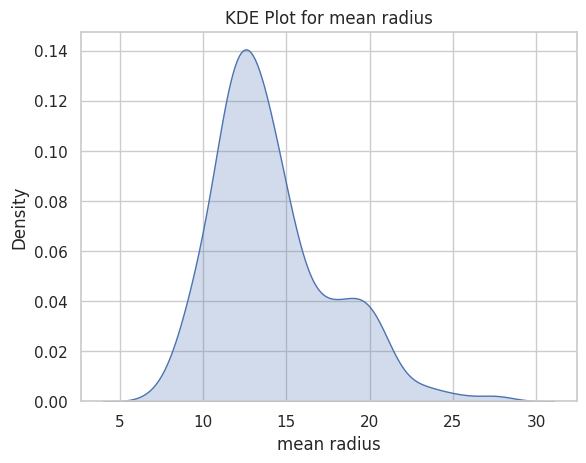

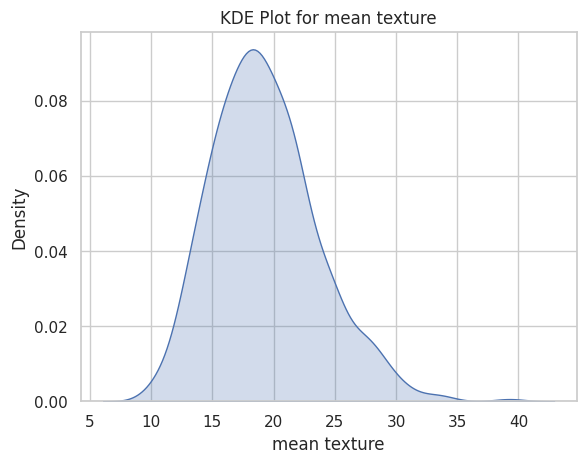

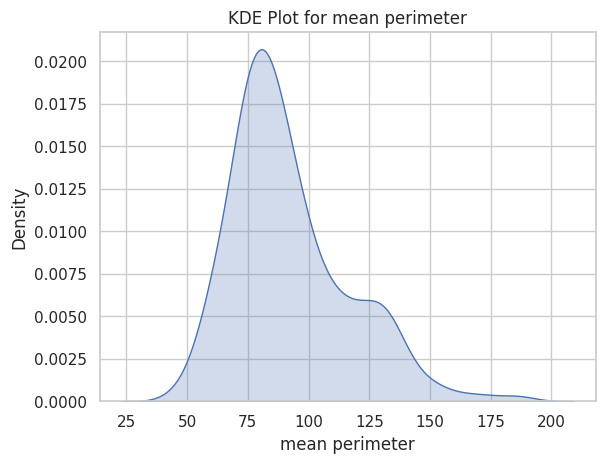

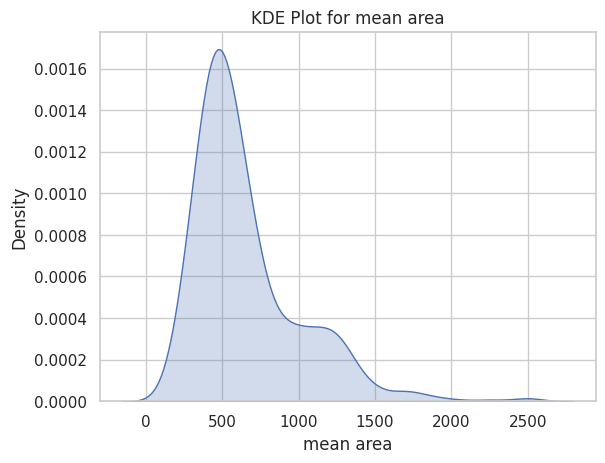

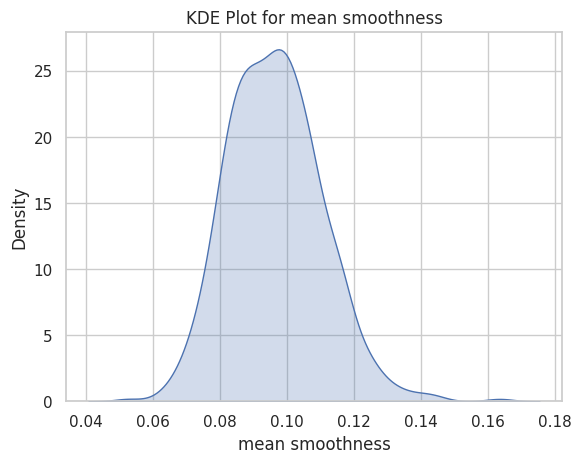

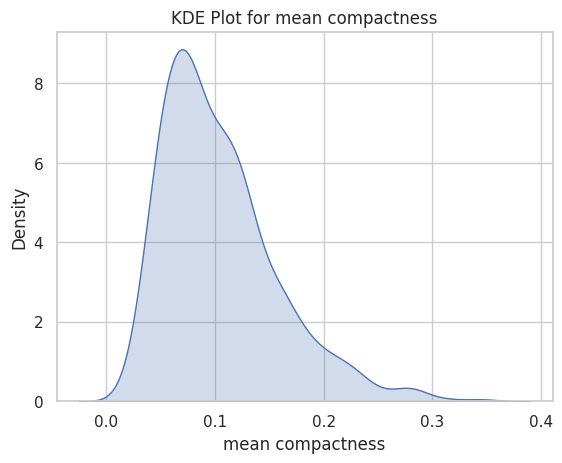

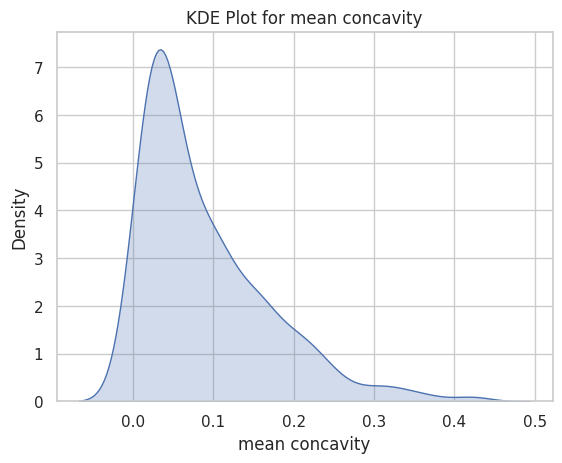

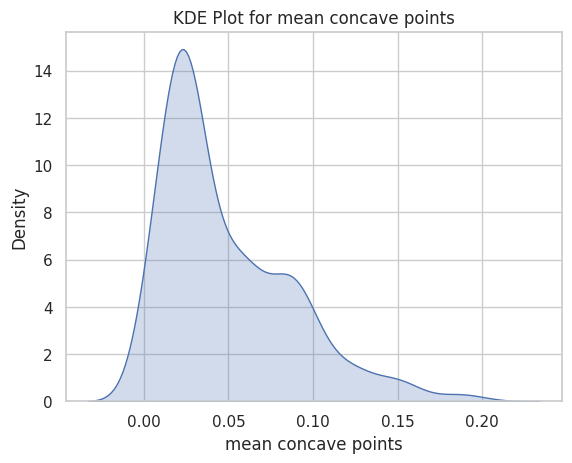

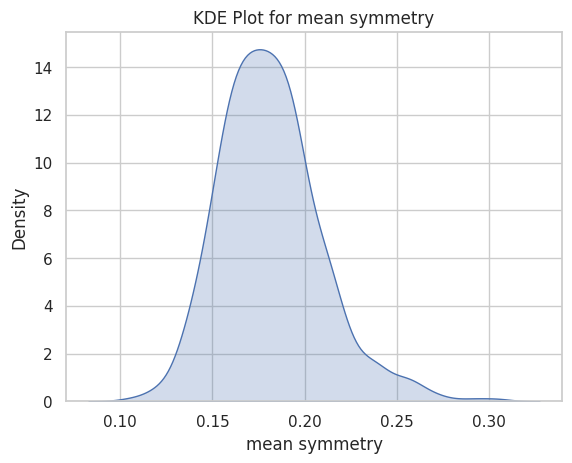

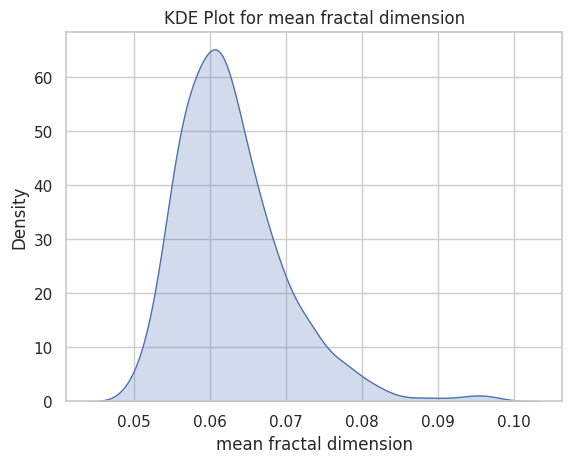

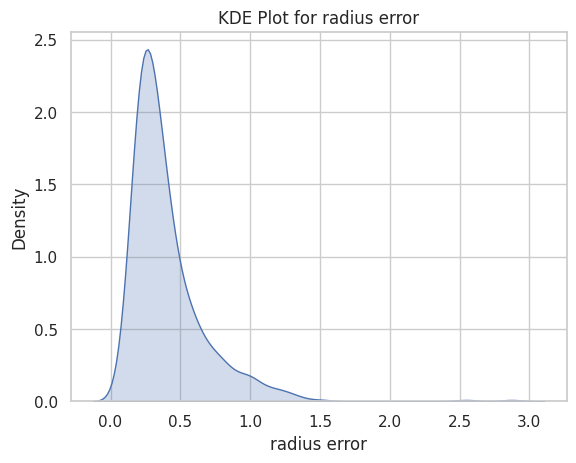

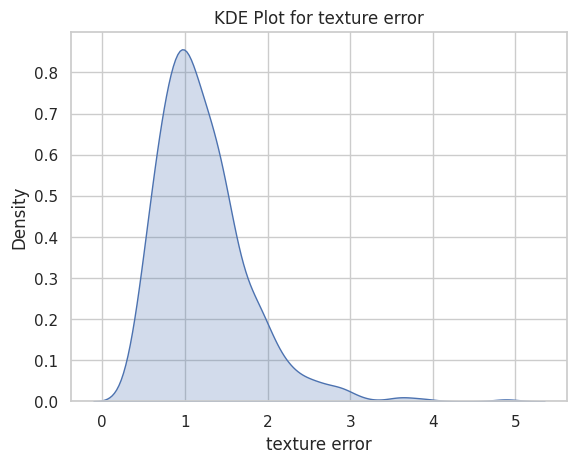

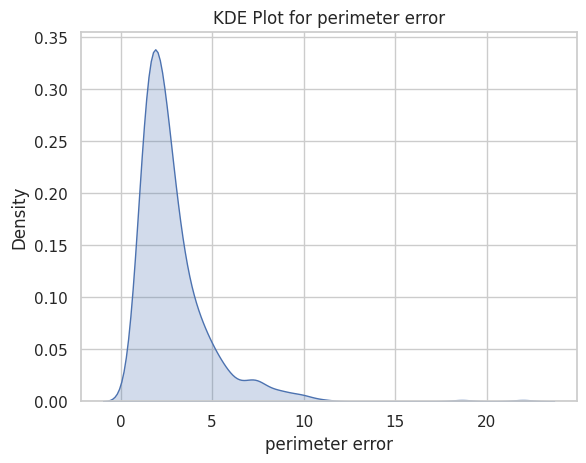

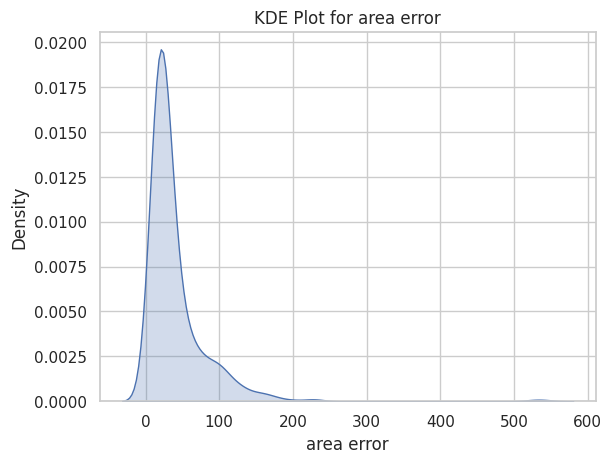

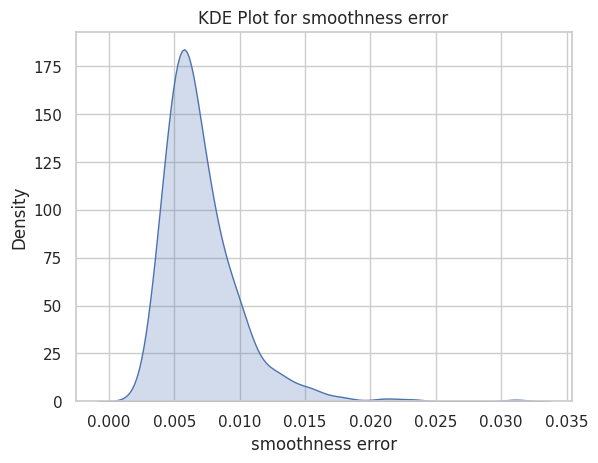

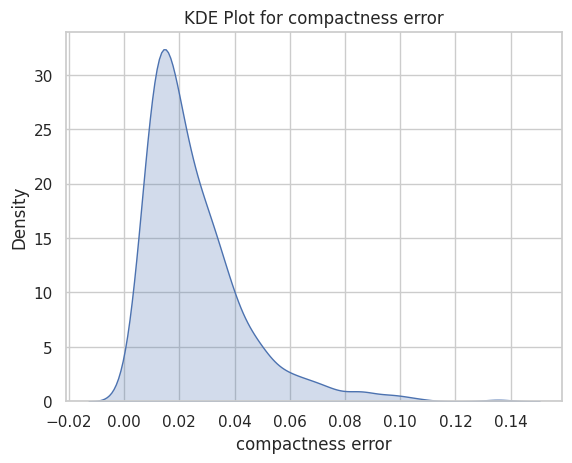

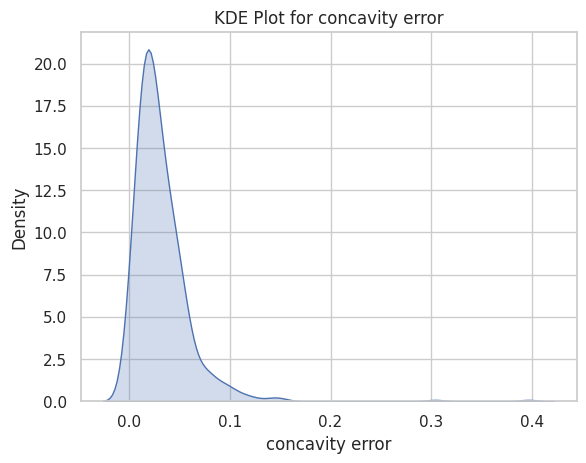

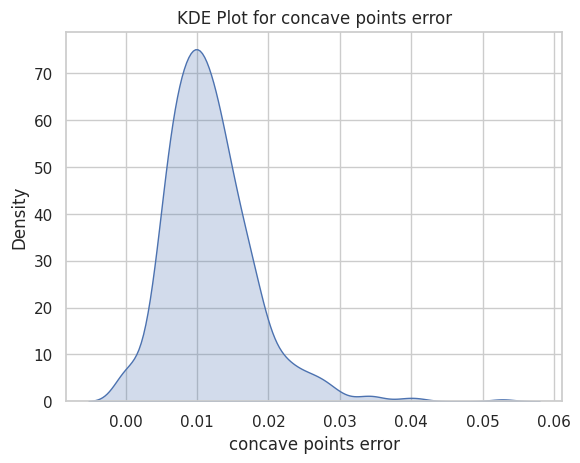

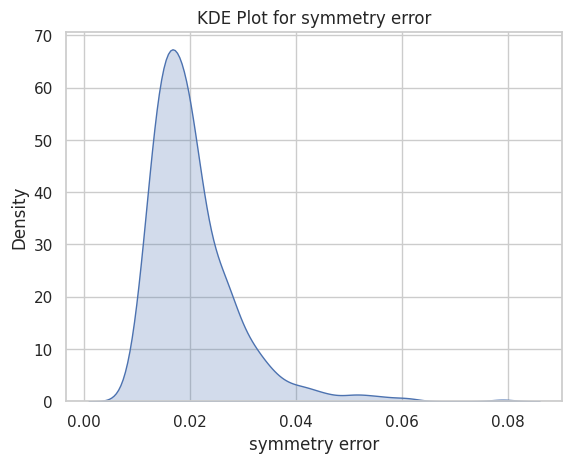

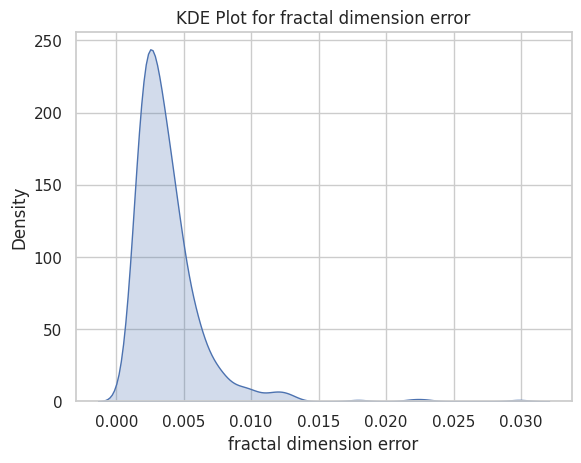

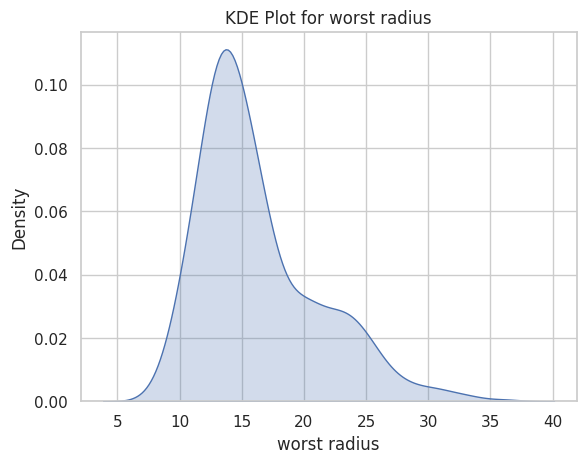

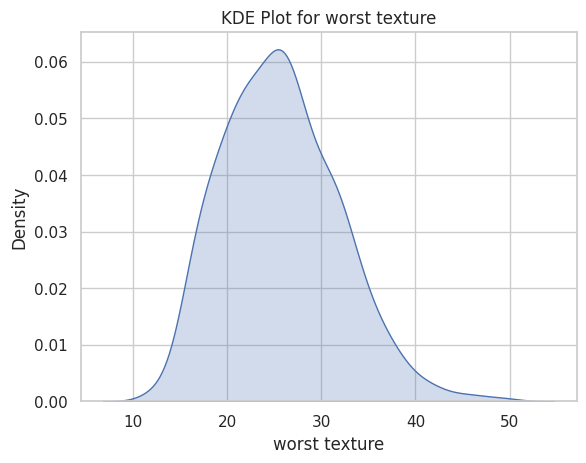

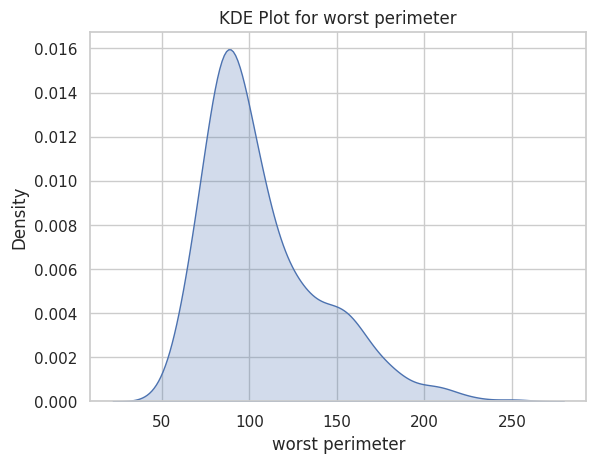

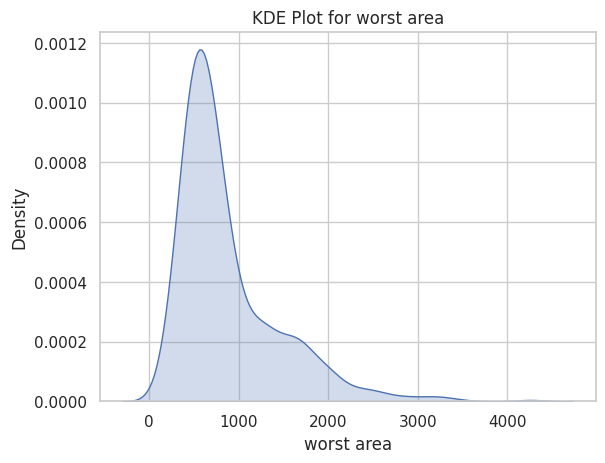

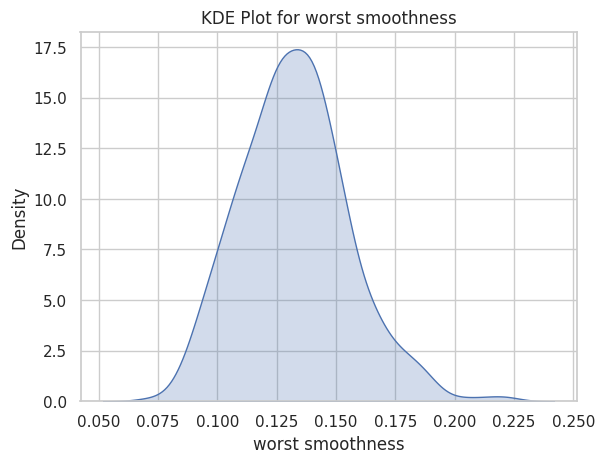

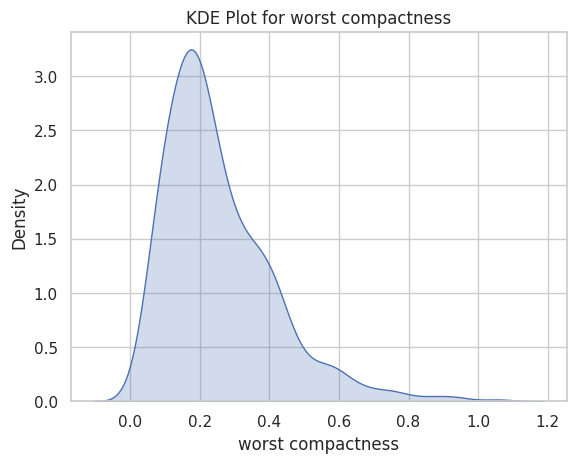

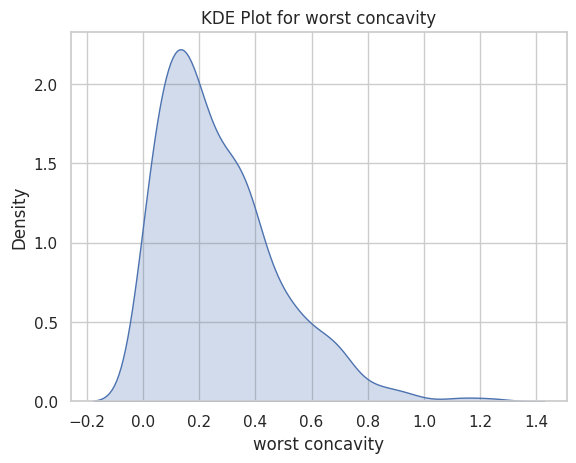

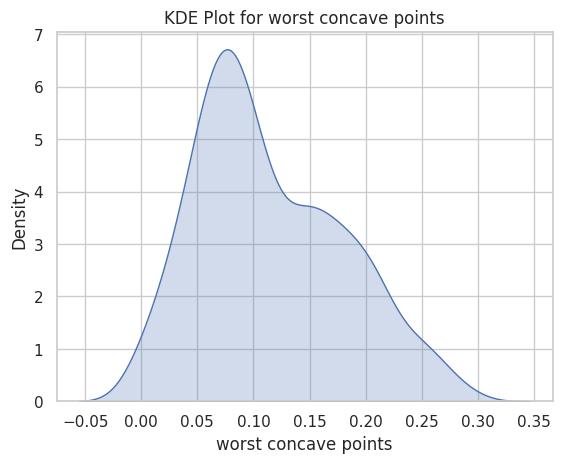

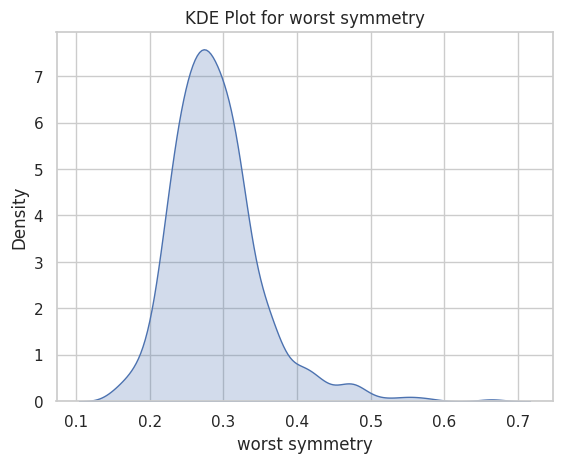

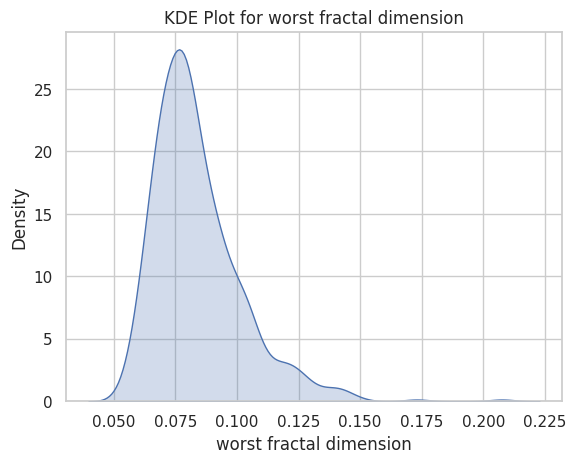

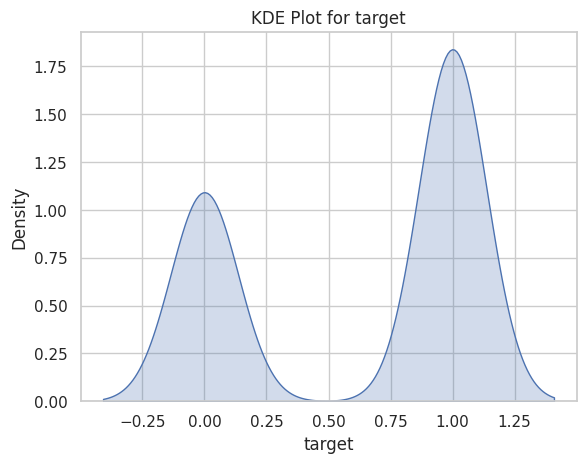

In [13]:
# Plot KDE for all features
sns.set(style="whitegrid")

# Plot KDE for each feature separately
for column in df.columns:
    plt.figure()
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE Plot for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Density')
    plt.show()

# columns mean texture,mean smoothness,symmetry,concave points error,worst texture,worst smoothness,worst symmetry are almost have a gaussian curve


In [14]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

<Axes: >

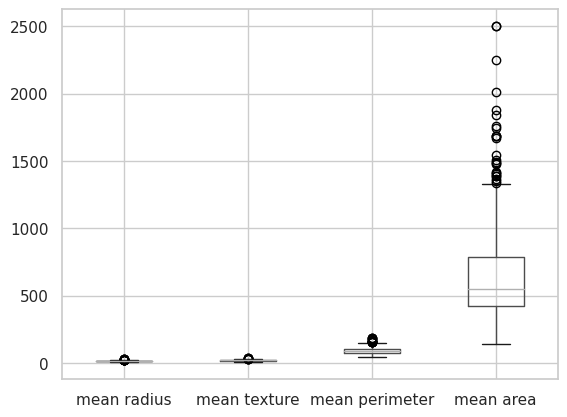

In [17]:
df[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].boxplot()

<Axes: >

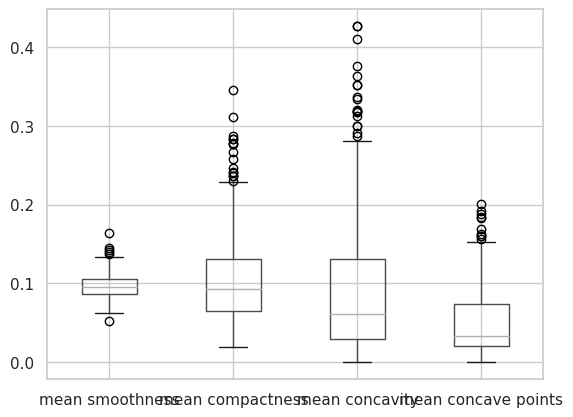

In [18]:
df[['mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points']].boxplot()

<Axes: >

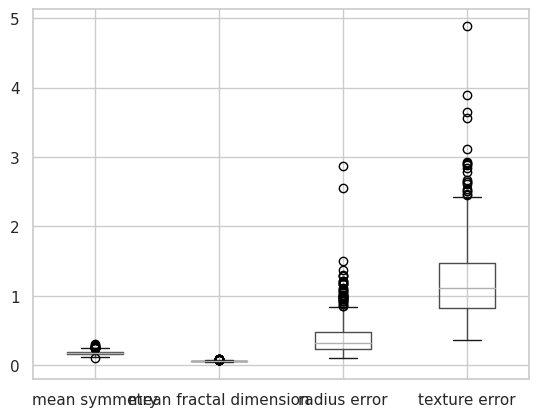

In [19]:
df[['mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error']].boxplot()

<Axes: >

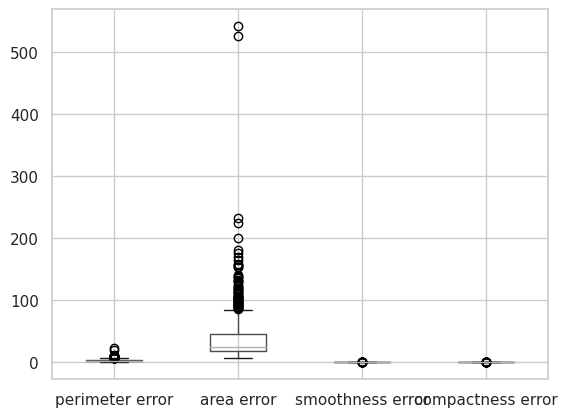

In [20]:
df[['perimeter error', 'area error',
       'smoothness error', 'compactness error']].boxplot()

<Axes: >

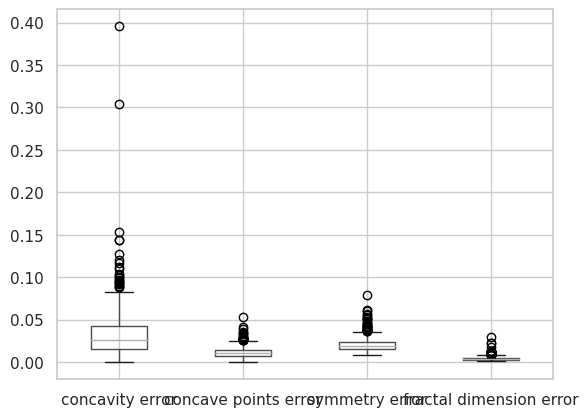

In [21]:
df[['concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error']].boxplot()

<Axes: >

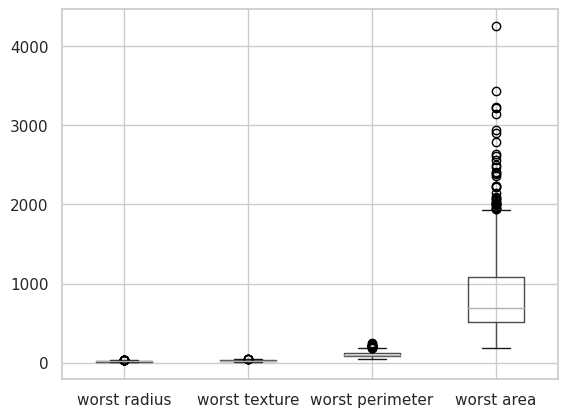

In [22]:
df[['worst radius', 'worst texture', 'worst perimeter', 'worst area']].boxplot()

<Axes: >

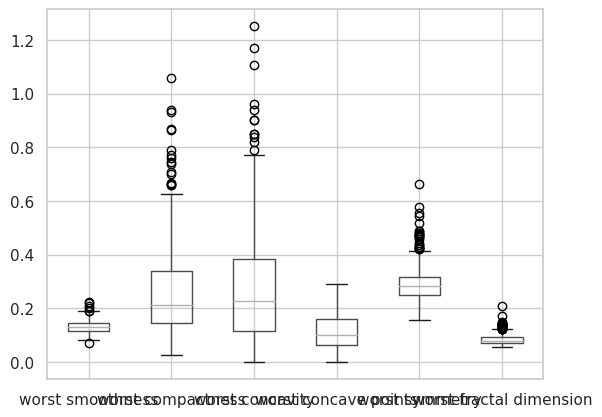

In [23]:
df[['worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']].boxplot()

# All the columns contains outliers

In [24]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# No null values

In [25]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

<BarContainer object of 2 artists>

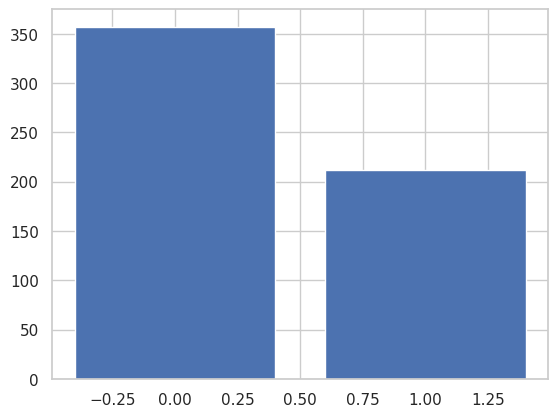

In [26]:
plt.bar(df['target'].unique(),df['target'].value_counts())

# Output is somewhat biased towards having cancer, almost 63 percent 1 and 37 percent 0s

<Axes: >

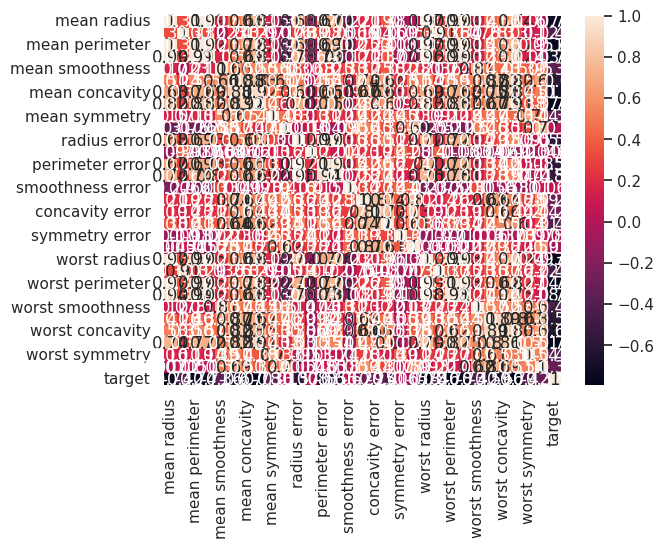

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [30]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract correlation values of target column with other columns
target_correlation = corr_matrix['target'].drop('target')

# Sort correlation values in descending order to find most correlated columns
most_correlated = target_correlation.abs().sort_values(ascending=False)

In [31]:
most_correlated

worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0.067016
mean fractal dimension     0

# So we can see from here that worst concave points column is most corelated with the output

## Let's start feature engineering

In [33]:
import pandas as pd

# Function to replace outliers with min or max values, except for the 'target' column
def replace_outliers_with_min_max(df, exclude_column='target'):
    df_clean = df.copy()
    for column in df_clean.columns:
        if column != exclude_column and df_clean[column].dtype in ['int64', 'float64']:  # Process only numerical columns except the excluded one
            Q1 = df_clean[column].quantile(0.25)
            Q3 = df_clean[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Replace outliers below the lower bound with the min value
            min_value = df_clean[column].min()
            df_clean.loc[df_clean[column] < lower_bound, column] = min_value

            # Replace outliers above the upper bound with the max value
            max_value = df_clean[column].max()
            df_clean.loc[df_clean[column] > upper_bound, column] = max_value

    return df_clean

# Example usage:
# Assuming df is your DataFrame
df_clean = replace_outliers_with_min_max(df, exclude_column='target')

# Check the result



In [ ]:
df_clean['target'].value_counts()

# Let us start our ml model

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as logreg


In [39]:
# independent features I am only going to take those columns who have corelation more than 50 percent with the target columns
# Calculate the correlation matrix
corr_matrix = df_clean.corr()

# Extract correlation values of target column with other columns
target_correlation = corr_matrix['target'].drop('target')

# Sort correlation values in descending order to find most correlated columns
most_correlated = target_correlation.abs().sort_values(ascending=False)

In [40]:
most_correlated

worst concave points       0.793566
mean concave points        0.761446
worst perimeter            0.742747
worst radius               0.738488
mean perimeter             0.720781
mean radius                0.706208
mean concavity             0.654033
mean area                  0.629704
worst concavity            0.623097
worst area                 0.611781
mean compactness           0.568991
worst compactness          0.553528
area error                 0.520874
radius error               0.459782
perimeter error            0.459255
worst texture              0.455512
worst smoothness           0.412204
mean texture               0.400373
worst symmetry             0.390115
mean smoothness            0.351065
concave points error       0.331697
mean symmetry              0.309361
worst fractal dimension    0.279479
compactness error          0.216351
concavity error            0.140029
smoothness error           0.114771
fractal dimension error    0.040553
symmetry error             0

In [ ]:
'worst concave points',
'mean concave points',
'worst perimeter',
'worst radius',
'mean perimeter',
'mean radius',
'mean concavity',
'mean area',
'worst concavity',
'worst area',
'mean compactness',
'worst compactness',
'area error'

In [42]:
X=df_clean[['worst concave points',
'mean concave points',
'worst perimeter',
'worst radius',
'mean perimeter',
'mean radius',
'mean concavity',
'mean area',
'worst concavity',
'worst area',
'mean compactness',
'worst compactness',
'area error']]

In [43]:
y=df_clean['target']

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [46]:
# Let us do SMOTE to do oversample
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with a random state for reproducibility
sm = SMOTE(random_state=2)

# Fit and resample the training data
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

# Check the shape of resampled data
print("Before SMOTE:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nAfter SMOTE:")
print("X_train_res shape:", X_train_res.shape)
print("y_train_res shape:", y_train_res.shape)


Before SMOTE:
X_train shape: (398, 13)
y_train shape: (398,)

After SMOTE:
X_train_res shape: (498, 13)
y_train_res shape: (498,)


In [49]:
y_train_res_series = pd.Series(y_train_res)

# Check the distribution of the resampled target variable
print("Distribution of resampled target variable:")
print(y_train_res_series.value_counts())

Distribution of resampled target variable:
1    249
0    249
Name: count, dtype: int64


# So yes we have sampled equally 1 and 0 to reduce any biasness in our model

In [51]:
# Let us standard scale our dataset x
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_res)
X_test_scaled=scaler.transform(X_test)

In [52]:
# Let us apply logistic regression
logreg=logreg()
logreg.fit(X_train_scaled,y_train_res)

LogisticRegression()

In [53]:
logreg.predict(X_test_scaled)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [54]:
# Let us find out the accuracy of our model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=logreg.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9649122807017544
[[ 61   2]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [1, 10, 20],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'tol': [0.0001, 0.001, 0.01],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial']
}



# Set up GridSearchCV
clf = GridSearchCV(logreg, param_grid=parameters, cv=5)

# Fit the model
clf.fit(X_train_scaled, y_train_res)

# Get the best parameters
print("Best parameters found: ", clf.best_params_)

# Get the best model
best_model = clf.best_estimator_


Best parameters found:  {'C': 1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001}


In [67]:
log = LogisticRegression(
    C=1,
    class_weight='balanced',
    fit_intercept=True,
    max_iter=100,
    multi_class='auto',
    penalty='none',
    solver='lbfgs',
    tol=0.0001
)
log.fit(X_train_scaled,y_train_res)


LogisticRegression(C=1, class_weight='balanced', penalty='none')

In [68]:
# Let us find out the accuracy of our model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=log.predict(X_test_scaled)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9649122807017544
[[ 61   2]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



In [69]:
X_test_scaled=scaler.transform(X_test)

In [73]:
import numpy as np

# Ensure you have all required features for prediction
sample_data = np.array([0.1864,0.0276,130.5,17.99,70.34,12.45,0.0913,450.5,0.2050,1326.0,0.1396,0.3255,22.74])

# Reshape the data to be 2D
sample_data_reshaped = sample_data.reshape(1, -1)

# Standardize the sample data
sample_data_scaled = scaler.transform(sample_data_reshaped)

# Make a prediction
prediction = logreg.predict(sample_data_scaled)
prediction_proba = logreg.predict_proba(sample_data_scaled)

print(prediction)


[1]
